# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [27]:
data = pd.read_csv('Categorical.csv')
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


Remove the duplicate index column from the dataset. 

In [28]:
data['continent'].unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [29]:
mapped_data = data.copy()
mapped_data['continent'] = mapped_data['continent'].map({'North America':0,'Europe':1,'Asia':2,'Africa':3,'South America':4, 'Oceania':5,'Seven seas (open ocean)':6, 'Antarctica':7})
mapped_data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,2
238,South Africa,25.083901,-29.000341,3
239,Zambia,27.774759,-13.458242,3


## Select the features

In [30]:
features = mapped_data.iloc[:,3:4]
features

,continent
0,0
1,2
2,3
3,0
4,1
...,...
236,5
237,2
238,3
239,3


## Clustering

Use 4 clusters initially.

In [31]:
kmeans = KMeans(4)
kmeans.fit(features)

KMeans(n_clusters=4)

## Clustering results

In [32]:
pred = kmeans.fit_predict(features)
data_pred = mapped_data.copy()
data_pred['Cluster'] = pred
data_pred

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,0
1,Afghanistan,66.004734,33.835231,2,2
2,Angola,17.537368,-12.293361,3,1
3,Anguilla,-63.064989,18.223959,0,0
4,Albania,20.049834,41.142450,1,0
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,3
237,Yemen,47.586762,15.909280,2,2
238,South Africa,25.083901,-29.000341,3,1
239,Zambia,27.774759,-13.458242,3,1


## Plot the data

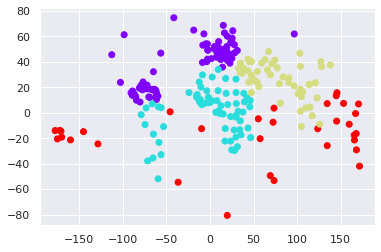

In [33]:
plot = plt.scatter(data['Longitude'], data['Latitude'], c = pred, cmap='rainbow')

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.